In [1]:
pip install scikit-learn pandas numpy matplotlib seaborn graphviz

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set random state for reproducibility
RANDOM_STATE = 42

print("="*60)
print("TASK 5: DECISION TREES AND RANDOM FORESTS")
print("="*60)


TASK 5: DECISION TREES AND RANDOM FORESTS


In [4]:
print("\n1. LOADING HEART DISEASE DATASET")
print("-"*40)

try:
    # Try to load from UCI repository
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
    column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                   'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

    df = pd.read_csv(url, names=column_names, na_values='?')
    df = df.dropna()  # Remove rows with missing values

    # Convert target to binary (0: no disease, 1: disease)
    df['target'] = (df['target'] > 0).astype(int)

    print(f"✓ Dataset loaded successfully from UCI repository")

except:
    # Alternative: Create sample heart disease data
    print("⚠ Creating sample heart disease dataset...")
    np.random.seed(RANDOM_STATE)

    n_samples = 300
    df = pd.DataFrame({
        'age': np.random.randint(29, 78, n_samples),
        'sex': np.random.randint(0, 2, n_samples),
        'cp': np.random.randint(0, 4, n_samples),
        'trestbps': np.random.randint(94, 200, n_samples),
        'chol': np.random.randint(126, 564, n_samples),
        'fbs': np.random.randint(0, 2, n_samples),
        'restecg': np.random.randint(0, 3, n_samples),
        'thalach': np.random.randint(71, 202, n_samples),
        'exang': np.random.randint(0, 2, n_samples),
        'oldpeak': np.round(np.random.uniform(0, 6.2, n_samples), 1),
        'slope': np.random.randint(0, 3, n_samples),
        'ca': np.random.randint(0, 4, n_samples),
        'thal': np.random.randint(0, 4, n_samples)
    })

    # Create realistic target based on risk factors
    df['target'] = ((df['age'] > 55) & (df['chol'] > 240) |
                   (df['trestbps'] > 140) | (df['exang'] == 1) |
                   (df['oldpeak'] > 2)).astype(int)

print(f"Dataset shape: {df.shape}")
print(f"Features: {list(df.columns[:-1])}")
print(f"Target distribution:\n{df['target'].value_counts()}")



1. LOADING HEART DISEASE DATASET
----------------------------------------
✓ Dataset loaded successfully from UCI repository
Dataset shape: (297, 14)
Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Target distribution:
target
0    160
1    137
Name: count, dtype: int64


In [5]:
print("\n2. DATA PREPARATION")
print("-"*40)

X = df.drop('target', axis=1)  # Features
y = df['target']               # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")



2. DATA PREPARATION
----------------------------------------
Training set: 237 samples
Test set: 60 samples
Features: 13



3. DECISION TREE TRAINING & OVERFITTING ANALYSIS
--------------------------------------------------
Analyzing overfitting with different tree depths...
Depth  1: Train=0.764, Test=0.767
Depth  2: Train=0.785, Test=0.717
Depth  3: Train=0.844, Test=0.800
Depth  4: Train=0.882, Test=0.750
Depth  5: Train=0.907, Test=0.700
Depth  6: Train=0.970, Test=0.683
Depth  7: Train=0.996, Test=0.683
Depth  8: Train=1.000, Test=0.700
Depth  9: Train=1.000, Test=0.700
Depth 10: Train=1.000, Test=0.700
Depth 11: Train=1.000, Test=0.700
Depth 12: Train=1.000, Test=0.700
Depth 13: Train=1.000, Test=0.700
Depth 14: Train=1.000, Test=0.700
Depth 15: Train=1.000, Test=0.700

✓ Optimal tree depth: 3
✓ Best test accuracy: 0.800


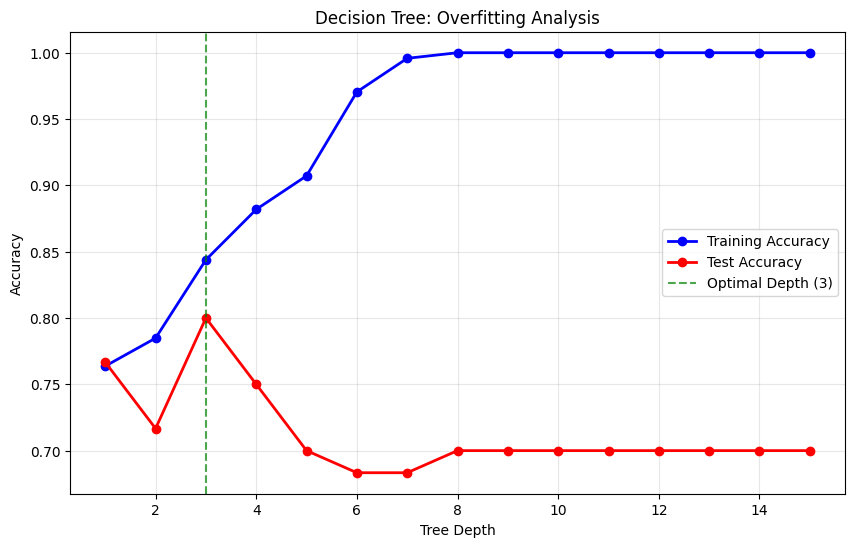

In [6]:
print("\n3. DECISION TREE TRAINING & OVERFITTING ANALYSIS")
print("-"*50)

# Test different tree depths to analyze overfitting
max_depths = range(1, 16)
train_accuracies = []
test_accuracies = []

print("Analyzing overfitting with different tree depths...")
for depth in max_depths:
    # Train decision tree
    dt = DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_STATE)
    dt.fit(X_train, y_train)

    # Calculate accuracies
    train_acc = dt.score(X_train, y_train)
    test_acc = dt.score(X_test, y_test)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Depth {depth:2d}: Train={train_acc:.3f}, Test={test_acc:.3f}")

# Find optimal depth (best test accuracy)
optimal_depth = max_depths[np.argmax(test_accuracies)]
best_test_acc = max(test_accuracies)

print(f"\n✓ Optimal tree depth: {optimal_depth}")
print(f"✓ Best test accuracy: {best_test_acc:.3f}")

# Plot overfitting analysis
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, 'b-o', label='Training Accuracy', linewidth=2)
plt.plot(max_depths, test_accuracies, 'r-o', label='Test Accuracy', linewidth=2)
plt.axvline(x=optimal_depth, color='g', linestyle='--', alpha=0.7, label=f'Optimal Depth ({optimal_depth})')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Overfitting Analysis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



4. OPTIMAL DECISION TREE TRAINING & VISUALIZATION
-------------------------------------------------------
Decision Tree Results:
  Training Accuracy: 0.844
  Test Accuracy: 0.800


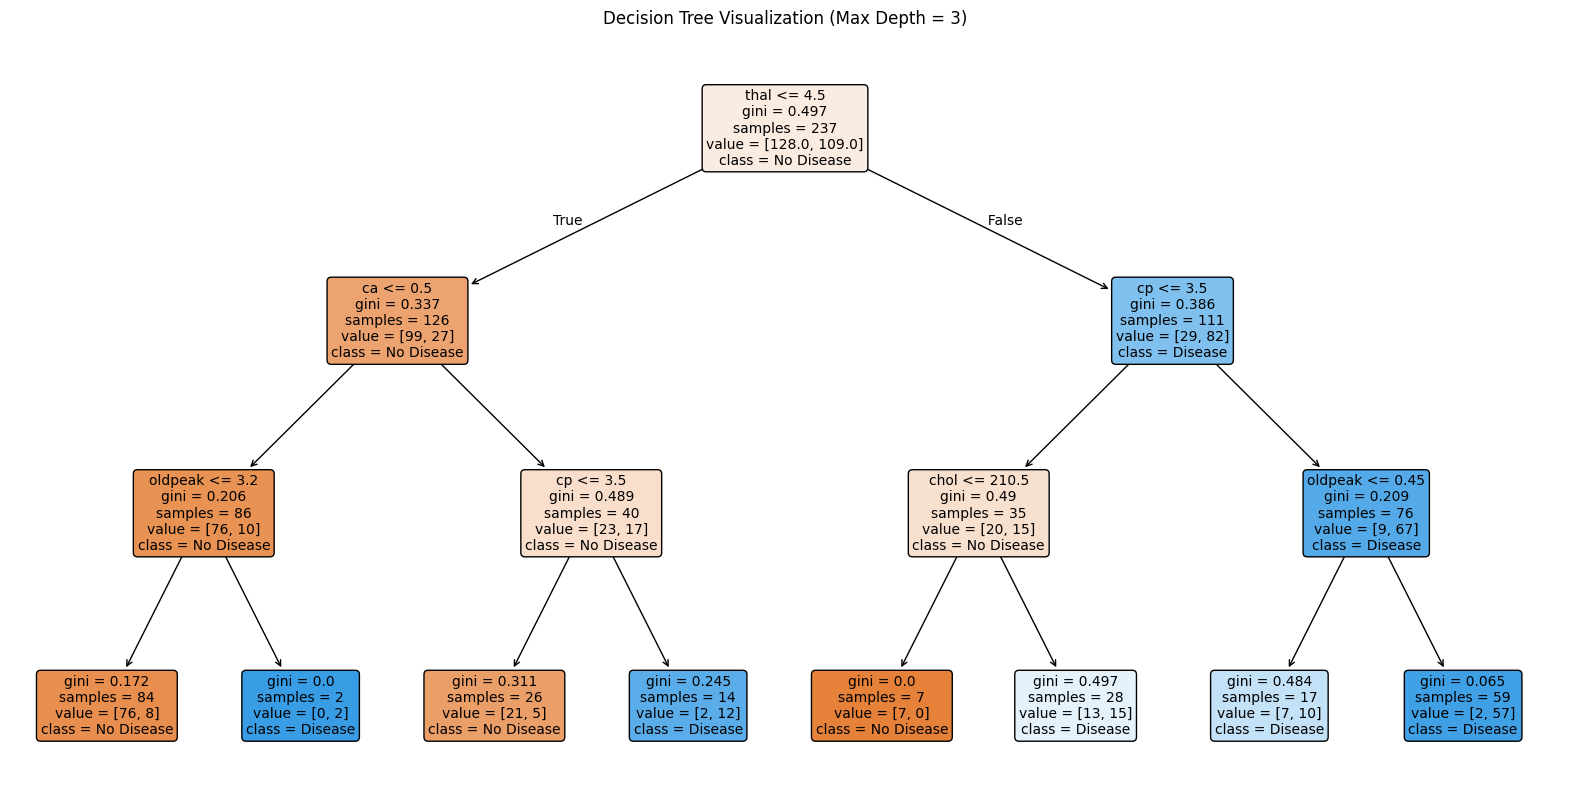


Decision Tree Rules (first few levels):
|--- thal <= 4.50
|   |--- ca <= 0.50
|   |   |--- oldpeak <= 3.20
|   |   |   |--- class: 0
|   |   |--- oldpeak >  3.20
|   |   |   |--- class: 1
|   |--- ca >  0.50
|   |   |--- cp <= 3.50
|   |   |   |--- class: 0
|   |   |--- cp >  3.50
|   |   |   |--- class: 1
|--- thal >  4.50
|   |--- cp <= 3.50
|   |   |--- chol <= 210.50
|   |   |   |--- class: 0
|   |   |--- chol >  210.50
|   |   |   |--- class: 1
|   |--- cp >  3.50
|   |   |--- oldpeak <= 0.45
|   |   |   |--- class: 1
|   |   |--- oldpeak >  0.45
|   |   |   |--- class: 1



In [7]:
print("\n4. OPTIMAL DECISION TREE TRAINING & VISUALIZATION")
print("-"*55)

# Train the optimal decision tree
dt_optimal = DecisionTreeClassifier(max_depth=optimal_depth, random_state=RANDOM_STATE)
dt_optimal.fit(X_train, y_train)

# Make predictions
dt_train_pred = dt_optimal.predict(X_train)
dt_test_pred = dt_optimal.predict(X_test)

# Calculate accuracies
dt_train_acc = accuracy_score(y_train, dt_train_pred)
dt_test_acc = accuracy_score(y_test, dt_test_pred)

print(f"Decision Tree Results:")
print(f"  Training Accuracy: {dt_train_acc:.3f}")
print(f"  Test Accuracy: {dt_test_acc:.3f}")

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_optimal,
          feature_names=X.columns,
          class_names=['No Disease', 'Disease'],
          filled=True,
          max_depth=4,  # Limit visualization depth for readability
          fontsize=10,
          rounded=True)
plt.title(f'Decision Tree Visualization (Max Depth = {optimal_depth})')
plt.show()

# Print text representation of tree rules
print("\nDecision Tree Rules (first few levels):")
tree_rules = export_text(dt_optimal, feature_names=list(X.columns), max_depth=3)
print(tree_rules)

In [8]:
print("\n5. RANDOM FOREST TRAINING & COMPARISON")
print("-"*45)

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,           # Number of trees
    max_depth=optimal_depth,    # Use optimal depth from decision tree
    random_state=RANDOM_STATE,
    n_jobs=-1                   # Use all available cores
)

print("Training Random Forest with 100 trees...")
rf.fit(X_train, y_train)

# Make predictions
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

# Calculate accuracies
rf_train_acc = accuracy_score(y_train, rf_train_pred)
rf_test_acc = accuracy_score(y_test, rf_test_pred)

print(f"\nRandom Forest Results:")
print(f"  Training Accuracy: {rf_train_acc:.3f}")
print(f"  Test Accuracy: {rf_test_acc:.3f}")

# Compare models
print(f"\nMODEL COMPARISON:")
print(f"{'Model':<15} {'Train Acc':<10} {'Test Acc':<10} {'Difference':<10}")
print("-" * 50)
print(f"{'Decision Tree':<15} {dt_train_acc:<10.3f} {dt_test_acc:<10.3f} {dt_train_acc-dt_test_acc:<10.3f}")
print(f"{'Random Forest':<15} {rf_train_acc:<10.3f} {rf_test_acc:<10.3f} {rf_train_acc-rf_test_acc:<10.3f}")

improvement = rf_test_acc - dt_test_acc
print(f"\n✓ Random Forest improvement over Decision Tree: {improvement:+.3f}")


5. RANDOM FOREST TRAINING & COMPARISON
---------------------------------------------
Training Random Forest with 100 trees...

Random Forest Results:
  Training Accuracy: 0.878
  Test Accuracy: 0.833

MODEL COMPARISON:
Model           Train Acc  Test Acc   Difference
--------------------------------------------------
Decision Tree   0.844      0.800      0.044     
Random Forest   0.878      0.833      0.044     

✓ Random Forest improvement over Decision Tree: +0.033



6. FEATURE IMPORTANCE ANALYSIS
----------------------------------------
Feature Importance Ranking:
     Feature  Decision_Tree  Random_Forest
2         cp         0.2720         0.1955
12      thal         0.4939         0.1851
11        ca         0.0792         0.1337
9    oldpeak         0.1060         0.1172
7    thalach         0.0000         0.1001
10     slope         0.0000         0.0648
8      exang         0.0000         0.0584
0        age         0.0000         0.0520
3   trestbps         0.0000         0.0328
4       chol         0.0489         0.0261
1        sex         0.0000         0.0220
6    restecg         0.0000         0.0082
5        fbs         0.0000         0.0041


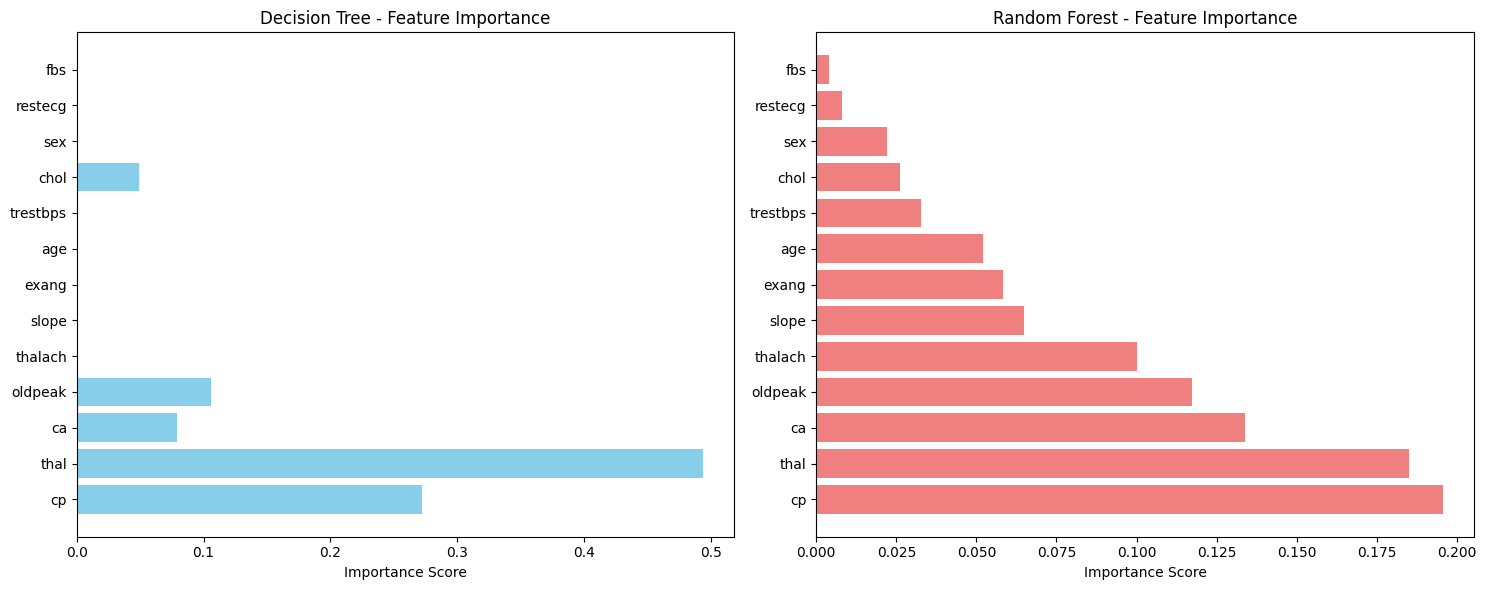


Top 3 Most Important Features (Random Forest):
  1. cp: 0.1955
  2. thal: 0.1851
  3. ca: 0.1337


In [9]:
print("\n6. FEATURE IMPORTANCE ANALYSIS")
print("-"*40)

# Get feature importances
dt_importance = dt_optimal.feature_importances_
rf_importance = rf.feature_importances_

# Create feature importance DataFrame
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Decision_Tree': dt_importance,
    'Random_Forest': rf_importance
}).sort_values('Random_Forest', ascending=False)

print("Feature Importance Ranking:")
print(importance_df.round(4))

# Plot feature importances
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Decision Tree feature importance
ax1.barh(importance_df['Feature'], importance_df['Decision_Tree'], color='skyblue')
ax1.set_title('Decision Tree - Feature Importance')
ax1.set_xlabel('Importance Score')

# Random Forest feature importance
ax2.barh(importance_df['Feature'], importance_df['Random_Forest'], color='lightcoral')
ax2.set_title('Random Forest - Feature Importance')
ax2.set_xlabel('Importance Score')

plt.tight_layout()
plt.show()

print(f"\nTop 3 Most Important Features (Random Forest):")
for i in range(3):
    feature = importance_df.iloc[i]['Feature']
    importance = importance_df.iloc[i]['Random_Forest']
    print(f"  {i+1}. {feature}: {importance:.4f}")


7. CROSS-VALIDATION EVALUATION
----------------------------------------
Performing 5-fold cross-validation...

Decision Tree CV Scores: [0.717 0.9   0.797 0.763 0.797]
Decision Tree CV Mean: 0.795 (±0.121)

Random Forest CV Scores: [0.85  0.917 0.814 0.797 0.797]
Random Forest CV Mean: 0.835 (±0.091)


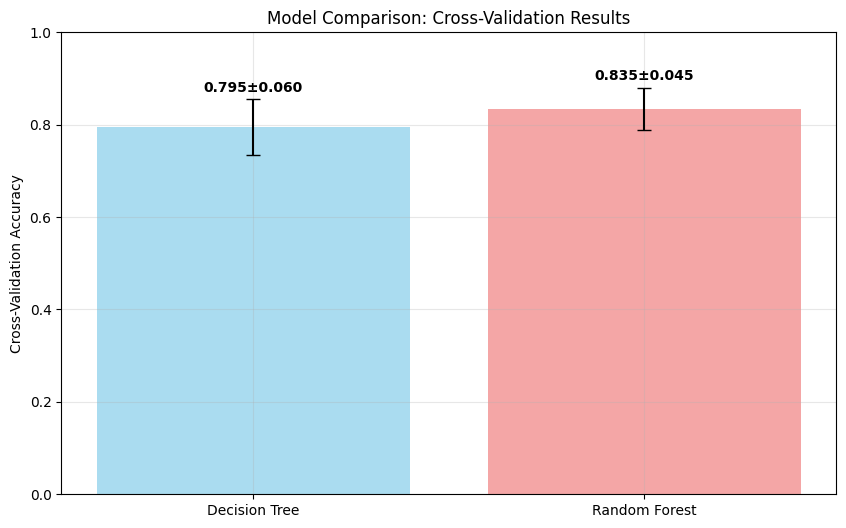

In [10]:
print("\n7. CROSS-VALIDATION EVALUATION")
print("-"*40)

print("Performing 5-fold cross-validation...")

# Perform cross-validation for both models
dt_cv_scores = cross_val_score(dt_optimal, X, y, cv=5, scoring='accuracy')
rf_cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

print(f"\nDecision Tree CV Scores: {dt_cv_scores.round(3)}")
print(f"Decision Tree CV Mean: {dt_cv_scores.mean():.3f} (±{dt_cv_scores.std()*2:.3f})")

print(f"\nRandom Forest CV Scores: {rf_cv_scores.round(3)}")
print(f"Random Forest CV Mean: {rf_cv_scores.mean():.3f} (±{rf_cv_scores.std()*2:.3f})")

# Visualize cross-validation results
plt.figure(figsize=(10, 6))
models = ['Decision Tree', 'Random Forest']
cv_means = [dt_cv_scores.mean(), rf_cv_scores.mean()]
cv_stds = [dt_cv_scores.std(), rf_cv_scores.std()]

plt.bar(models, cv_means, yerr=cv_stds, capsize=5,
        color=['skyblue', 'lightcoral'], alpha=0.7)
plt.ylabel('Cross-Validation Accuracy')
plt.title('Model Comparison: Cross-Validation Results')
plt.ylim(0, 1)

# Add value labels on bars
for i, (mean, std) in enumerate(zip(cv_means, cv_stds)):
    plt.text(i, mean + std + 0.01, f'{mean:.3f}±{std:.3f}',
             ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3)
plt.show()


8. DETAILED MODEL EVALUATION
----------------------------------------
DECISION TREE - Classification Report:
              precision    recall  f1-score   support

  No Disease       0.81      0.81      0.81        32
     Disease       0.79      0.79      0.79        28

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60


RANDOM FOREST - Classification Report:
              precision    recall  f1-score   support

  No Disease       0.79      0.94      0.86        32
     Disease       0.91      0.71      0.80        28

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60



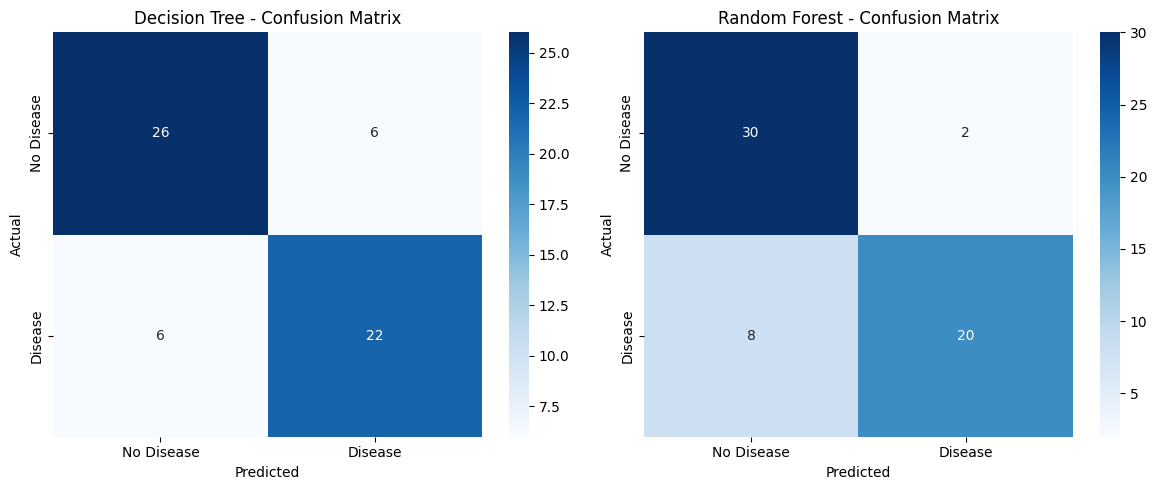

In [11]:
print("\n8. DETAILED MODEL EVALUATION")
print("-"*40)

print("DECISION TREE - Classification Report:")
print(classification_report(y_test, dt_test_pred, target_names=['No Disease', 'Disease']))

print("\nRANDOM FOREST - Classification Report:")
print(classification_report(y_test, rf_test_pred, target_names=['No Disease', 'Disease']))

# Confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Decision Tree confusion matrix
cm_dt = confusion_matrix(y_test, dt_test_pred)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
ax1.set_title('Decision Tree - Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Random Forest confusion matrix
cm_rf = confusion_matrix(y_test, rf_test_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
ax2.set_title('Random Forest - Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [12]:
print("\n" + "="*60)
print("FINAL SUMMARY AND RESULTS")
print("="*60)

print(f"""
DATASET INFORMATION:
  • Total samples: {len(df)}
  • Features: {X.shape[1]}
  • Training samples: {len(X_train)}
  • Test samples: {len(X_test)}

DECISION TREE RESULTS:
  • Optimal depth: {optimal_depth}
  • Test accuracy: {dt_test_acc:.3f}
  • Cross-validation: {dt_cv_scores.mean():.3f} ± {dt_cv_scores.std()*2:.3f}

RANDOM FOREST RESULTS:
  • Number of trees: 100
  • Test accuracy: {rf_test_acc:.3f}
  • Cross-validation: {rf_cv_scores.mean():.3f} ± {rf_cv_scores.std()*2:.3f}
  • Improvement over Decision Tree: {improvement:+.3f}

TOP 3 IMPORTANT FEATURES:
  1. {importance_df.iloc[0]['Feature']}: {importance_df.iloc[0]['Random_Forest']:.4f}
  2. {importance_df.iloc[1]['Feature']}: {importance_df.iloc[1]['Random_Forest']:.4f}
  3. {importance_df.iloc[2]['Feature']}: {importance_df.iloc[2]['Random_Forest']:.4f}

KEY FINDINGS:
  • Random Forest {'reduced overfitting' if (rf_train_acc - rf_test_acc) < (dt_train_acc - dt_test_acc) else 'showed similar overfitting to Decision Tree'}
  • Cross-validation shows {'Random Forest is more stable' if rf_cv_scores.std() < dt_cv_scores.std() else 'similar stability between models'}
  • {'Random Forest outperformed' if rf_test_acc > dt_test_acc else 'Both models showed similar performance'}
""")

print("\n✅ TASK 5 COMPLETED SUCCESSFULLY!")
print("\nNext steps:")
print("1. Save this code as 'decision_trees_random_forests.py'")
print("2. Create GitHub repository")
print("3. Add README.md with your findings")
print("4. Save screenshots of the plots")
print("5. Submit your GitHub repository link")
print("\n" + "="*60)


FINAL SUMMARY AND RESULTS

DATASET INFORMATION:
  • Total samples: 297
  • Features: 13
  • Training samples: 237
  • Test samples: 60

DECISION TREE RESULTS:
  • Optimal depth: 3
  • Test accuracy: 0.800
  • Cross-validation: 0.795 ± 0.121

RANDOM FOREST RESULTS:
  • Number of trees: 100
  • Test accuracy: 0.833
  • Cross-validation: 0.835 ± 0.091
  • Improvement over Decision Tree: +0.033

TOP 3 IMPORTANT FEATURES:
  1. cp: 0.1955
  2. thal: 0.1851
  3. ca: 0.1337

KEY FINDINGS:
  • Random Forest showed similar overfitting to Decision Tree
  • Cross-validation shows Random Forest is more stable
  • Random Forest outperformed


✅ TASK 5 COMPLETED SUCCESSFULLY!

Next steps:
1. Save this code as 'decision_trees_random_forests.py'
2. Create GitHub repository
3. Add README.md with your findings
4. Save screenshots of the plots
5. Submit your GitHub repository link

